<a href="https://colab.research.google.com/github/Thiraput01/My_ML_learning/blob/main/Neural_Net_z_to_h/Makemore_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
#build the vocab mapping
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

# Build datasets

In [ ]:
block_size = 3 # context length: how many characters do we take to

def build_datasets(words):

  X, Y = [], []
  for w in words:
    # print('current word :', w)
    context = [0] * block_size
    for ch in w + '.':
        idx = stoi[ch]
        X.append(context)
        Y.append(idx)
        # print(''.join(itos[i] for i in context), '--->', itos[idx])
        context = context[1:] + [idx]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y


random.seed(42)
random.shuffle(words)
# train 80%
# val 10%
# test 10%
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_datasets(words[:n1])
Xdev, Ydev = build_datasets(words[n1:n2])
Xte, Yte = build_datasets(words[n2:])


torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])




# Init parameters



In [ ]:
C = torch.randn((27, 10))
W1 = torch.randn((30, 200))
b1 = torch.randn(200)
W2 = torch.randn((200, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters)

11897

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
epochs = 200000

# Train the model

In [ ]:
lr_i = []
loss_i = []
step_i = []

In [ ]:
for i in range(epochs):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  embd = C[Xtr[ix]] # 32, 3, 2
  h = torch.tanh(embd.view(-1, 30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])


  # backward pass
  for p in parameters:
      p.grad = None
  loss.backward()

  # learning rate decay
  lr = 0.1 if i < 100000 else 0.01
  # update
  for p in parameters:
      p.data += -lr * p.grad

  step_i.append(i)
  loss_i.append(loss.log10().item())

print(f'batch loss : {loss.item()}')

batch loss : 2.150453805923462


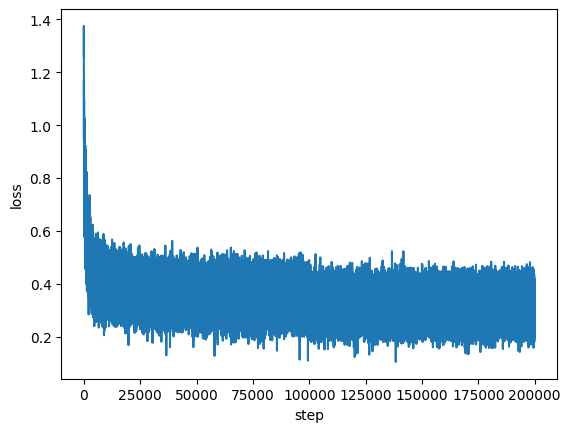

In [ ]:
plt.plot(step_i, loss_i)
plt.xlabel("step")
plt.ylabel("loss")
plt.show()

# Eval model

In [ ]:
embd = C[Xdev] # 32, 3, 2
h = torch.tanh(embd.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(f'validation loss : {loss.item()}')

validation loss : 2.162618398666382




> Compare with test data



In [ ]:
embd = C[Xtr] # 32, 3, 2
h = torch.tanh(embd.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print(f'training loss : {loss.item()}')

training loss : 2.1171529293060303


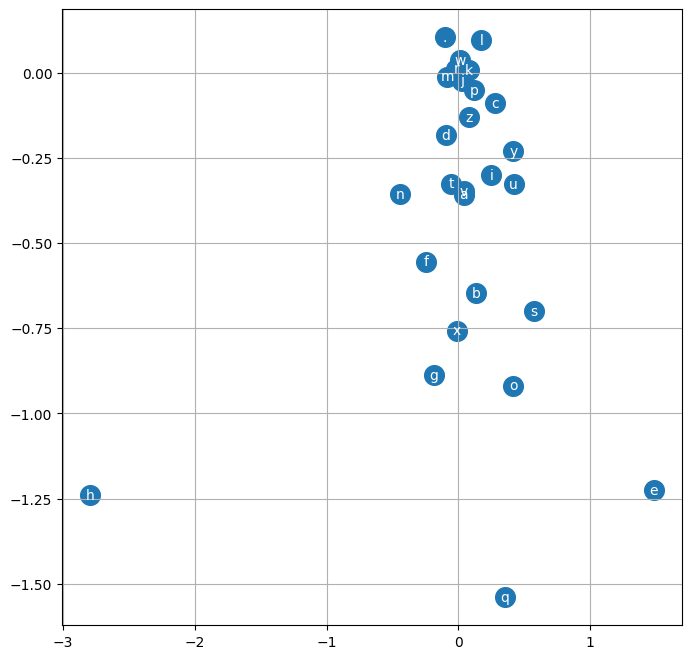

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

# Sampling from the model

In [ ]:
for _ in range(20):

  out = []
  context = [0] * block_size # initialize with all ...
  while True:
    emb = C[torch.tensor([context])] # (1,block_size,d)
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    idx = torch.multinomial(probs, num_samples=1).item()
    context = context[1:] + [idx]
    out.append(idx)
    if idx == 0:
      break
  print(''.join(itos[i] for i in out))

aadyahsera.
rimella.
abraya.
roba.
malioten.
kibin.
mikhari.
mariellyne.
demarian.
rrunardanah.
machanlergerton.
anon.
ahaan.
ala.
teleeona.
yomaylener.
ella.
rithally.
mel.
yanaya.
